In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np 
from time import time

from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score

In [2]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', None)

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

#Функция, которая к основной информации из метода info добавляет информацию о доли пропущенных значений
def file_info_null(df_tmp): 
    df1_tmp = pd.DataFrame(df_tmp.dtypes)
    df1_tmp = df1_tmp.reset_index()
    df1_tmp.columns = ['name','type']
    df1_tmp['NN_Count'] = 0 #столбце для количества не пустых значений в столбце DataFrame
    df1_tmp['isnull']  = 0    
    c1 = len(df_tmp.index)
    for i in range(0,len(df_tmp.columns)):
        df1_tmp.loc[i,'NN_Count'] =  df_tmp[df_tmp.columns[i]].count()
        df1_tmp.loc[i,'isnull'] = (c1 - df_tmp[df_tmp.columns[i]].count()) / c1
    
    cm = sns.light_palette("green", as_cmap=True)
    s = df1_tmp.sort_values(by = 'isnull', ascending = False).style.background_gradient(cmap=cm)
    print(df1_tmp.sort_values(by = 'isnull', ascending = False).to_string(formatters={'isnull':'{:.2%}'.format}))
    
    
def file_info(df):
    printmd('**Общая информация - метод info**')
    file_info_null(df)
    for col in df.columns:
        temp_str = '**Описание столбца ' + col + '**'
        printmd(temp_str)
        print(df[col].describe())
     
    printmd('**Есть ли дубликаты**')
    print(df.duplicated().sum())  

In [4]:
file_info(df_test)

**Общая информация - метод info**

           name     type  NN_Count isnull
9         Cabin   object        91 78.23%
4           Age  float64       332 20.57%
8          Fare  float64       417  0.24%
0   PassengerId    int64       418  0.00%
1        Pclass    int64       418  0.00%
2          Name   object       418  0.00%
3           Sex   object       418  0.00%
5         SibSp    int64       418  0.00%
6         Parch    int64       418  0.00%
7        Ticket   object       418  0.00%
10     Embarked   object       418  0.00%


**Описание столбца PassengerId**

count     418.000000
mean     1100.500000
std       120.810458
min       892.000000
25%       996.250000
50%      1100.500000
75%      1204.750000
max      1309.000000
Name: PassengerId, dtype: float64


**Описание столбца Pclass**

count    418.000000
mean       2.265550
std        0.841838
min        1.000000
25%        1.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64


**Описание столбца Name**

count                    418
unique                   418
top       Pulbaum, Mr. Franz
freq                       1
Name: Name, dtype: object


**Описание столбца Sex**

count      418
unique       2
top       male
freq       266
Name: Sex, dtype: object


**Описание столбца Age**

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64


**Описание столбца SibSp**

count    418.000000
mean       0.447368
std        0.896760
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64


**Описание столбца Parch**

count    418.000000
mean       0.392344
std        0.981429
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        9.000000
Name: Parch, dtype: float64


**Описание столбца Ticket**

count          418
unique         363
top       PC 17608
freq             5
Name: Ticket, dtype: object


**Описание столбца Fare**

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64


**Описание столбца Cabin**

count                  91
unique                 76
top       B57 B59 B63 B66
freq                    3
Name: Cabin, dtype: object


**Описание столбца Embarked**

count     418
unique      3
top         S
freq      270
Name: Embarked, dtype: object


**Есть ли дубликаты**

0


In [5]:
file_info(df_train)

**Общая информация - метод info**

           name     type  NN_Count isnull
10        Cabin   object       204 77.10%
5           Age  float64       714 19.87%
11     Embarked   object       889  0.22%
0   PassengerId    int64       891  0.00%
1      Survived    int64       891  0.00%
2        Pclass    int64       891  0.00%
3          Name   object       891  0.00%
4           Sex   object       891  0.00%
6         SibSp    int64       891  0.00%
7         Parch    int64       891  0.00%
8        Ticket   object       891  0.00%
9          Fare  float64       891  0.00%


**Описание столбца PassengerId**

count    891.000000
mean     446.000000
std      257.353842
min        1.000000
25%      223.500000
50%      446.000000
75%      668.500000
max      891.000000
Name: PassengerId, dtype: float64


**Описание столбца Survived**

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64


**Описание столбца Pclass**

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64


**Описание столбца Name**

count                 891
unique                891
top       Chip, Mr. Chang
freq                    1
Name: Name, dtype: object


**Описание столбца Sex**

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object


**Описание столбца Age**

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


**Описание столбца SibSp**

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64


**Описание столбца Parch**

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64


**Описание столбца Ticket**

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object


**Описание столбца Fare**

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


**Описание столбца Cabin**

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object


**Описание столбца Embarked**

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object


**Есть ли дубликаты**

0


In [6]:
def color_(val):
    color = 'black'
    if val < -0.2:
        color = 'red' 
    if val > 0.2:
        color = 'green' 
    return 'color: %s' % color

In [7]:
df_test.corr().style.applymap(color_)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.026751,-0.034102,0.003818,0.043080,0.008211
Pclass,-0.026751,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,-0.577147,0.337932,0.171539,0.230046,1.000000


In [8]:
df_train.corr().style.applymap(color_)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [9]:
df_full = df_train.append(df_test, ignore_index=True, sort=False)
df_fare = pd.pivot_table(df_full.query('Fare != 0'), columns = 'Pclass', values = 'Fare' , aggfunc = 'median')
df_fare

Pclass,1,2,3
Fare,61.3792,15.05,8.05


In [10]:
df_full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df_train.loc[(df_train['Fare'] == 0) & (df_train['Pclass'] == 3),'Fare'] = 61.38
df_train.loc[(df_train['Fare'] == 0) & (df_train['Pclass'] == 2),'Fare']= 15.05
df_train.loc[(df_train['Fare'] == 0) & (df_train['Pclass'] == 1),'Fare'] = 8.05
df_test.loc[(df_test['Fare'] == 0) & (df_test['Pclass'] == 3),'Fare'] = 61.38
df_test.loc[(df_test['Fare'] == 0) & (df_test['Pclass'] == 2),'Fare'] = 15.05
df_test.loc[(df_test['Fare'] == 0) & (df_test['Pclass'] == 1),'Fare'] = 8.05

In [12]:
df_test[df_test['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [13]:
df_test.loc[152, 'Fare'] = 8.05

In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [15]:
df_full[df_full['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [16]:
df_full.query('Fare > 70 &  Fare < 90  & Pclass == 1')['Embarked'].value_counts()

C    29
S    23
Name: Embarked, dtype: int64

In [17]:
df_train['Embarked'] = df_train['Embarked'].fillna('S')

In [18]:
df_train.query('Ticket == "113572"')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


In [19]:
df_train1 = df_train.drop(['Cabin'], axis = 1 )
df_test1 = df_test.drop(['Cabin'], axis = 1 )

In [20]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [21]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [22]:
df_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [23]:
df_train['Sex'] = df_train['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [24]:
df_train['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [25]:
df_test['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [26]:
df_test['Sex'] = df_test['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [27]:
df_test['Sex'].value_counts()

1    266
0    152
Name: Sex, dtype: int64

### Восстанавливаем возраст

In [28]:
age_columns = ['PassengerId','Age','Pclass', 'SibSp', 'Parch', 'Fare']
df_age = df_train[age_columns].append(df_test[age_columns], ignore_index=True, sort=False)
df_age = df_age.set_index('PassengerId')
df_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     1046 non-null   float64
 1   Pclass  1309 non-null   int64  
 2   SibSp   1309 non-null   int64  
 3   Parch   1309 non-null   int64  
 4   Fare    1309 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 61.4 KB


In [29]:
age_columns_ml_1 = df_age[df_age['Age'].isna()].drop('Age', axis=1) #что будем восстанавливать
age_columns_ml_1.head()

,Pclass,SibSp,Parch,Fare
PassengerId,,,,
6,3,0,0,8.4583
18,2,0,0,13.0000
20,3,0,0,7.2250
27,3,0,0,7.2250
29,3,0,0,7.8792


In [30]:
age_columns_ml = df_age[~df_age['Age'].isna()]
age_columns_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 1 to 1307
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     1046 non-null   float64
 1   Pclass  1046 non-null   int64  
 2   SibSp   1046 non-null   int64  
 3   Parch   1046 non-null   int64  
 4   Fare    1046 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 49.0 KB


In [31]:
def df_split(df_tmp, col): # Функция разбивает данные на обучающую и валидационную выборки в соотношении 75:25
    df_train_tmp, df_valid_tmp = train_test_split(df_tmp, test_size=0.25, random_state=12345)

    train_features_tmp = df_train_tmp.drop([col], axis=1) #тренировочная выборка
    train_target_tmp = df_train_tmp[col] #тренировочная выборка

    valid_features_tmp = df_valid_tmp.drop([col], axis=1) #валидационная выборка
    valid_target_tmp = df_valid_tmp[col] #валидационная выборка
    
    return  train_features_tmp, train_target_tmp, valid_features_tmp, valid_target_tmp

In [32]:
age_columns_ml_train, age_columns_ml_test = train_test_split(age_columns_ml, test_size=0.25, random_state=12345)
age_columns_ml_test_features = age_columns_ml_test.drop('Age', axis=1)
age_columns_ml_test_target = age_columns_ml_test['Age']
age_train_features, age_train_target, age_valid_features, age_valid_target = df_split(age_columns_ml, 'Age')

### Восстанавливаем возраст

### Линейная регрессия

In [33]:
model_lr = LinearRegression()
score_lr = cross_val_score(model_lr, age_train_features, age_train_target, cv=3 )
print('Средняя оценка качества модели на обучающей выборке равна {:.4f}'.format(score_lr.mean()))

Средняя оценка качества модели на обучающей выборке равна 0.1816


### Случайный лес

In [34]:
#Количество деревьев в случайном лесу
n_estimators = [int(x) for x in np.linspace(start = 2, stop = 30, num = 15)]
#Количество полей , которые необходимо учитывать при каждом разделении
max_features = [1, 2, 3, 4]
# Максимальное количество уровней в дереве
max_depth = [int(x) for x in np.linspace(2, 20, num = 10)]
max_depth.append(None)
# Минимальное количество выборок, необходимых для разделения узла
min_samples_split = [2, 5, 10]
# Минимальное количество образцов, необходимое на каждом листовом узле
min_samples_leaf = [1, 2, 4]
# Способ отбора образцов для обучения каждого дерева
bootstrap = [True, False]

# Создаем случайную сетку
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30], 'max_features': [1, 2, 3, 4], 'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [35]:
# Функция печатает TOP3 лучших результатов
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [36]:
start = time() #время выполнения 3 минуты
rf = RandomForestRegressor(random_state=12345)
# Случайный поиск параметров с кросс-валдицией, поиск с шагом 100 различных комбинаций параметров
rf_random = RandomizedSearchCV( estimator = rf, param_distributions = random_grid,   n_iter = 100, cv = 3, 
                               verbose=0, random_state=12345, n_jobs = -1 )
rf_random.fit(age_train_features, age_train_target)
rf_random.best_params_

print('Время выполнения: {0:0.2f} сек'.format(time() - start))

Время выполнения: 3.58 сек


In [37]:
report(rf_random.cv_results_)

Model with rank: 1
Mean validation score: 0.277 (std: 0.084)
Parameters: {'n_estimators': 8, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 3, 'max_depth': 4, 'bootstrap': False}

Model with rank: 2
Mean validation score: 0.270 (std: 0.060)
Parameters: {'n_estimators': 30, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 1, 'max_depth': 4, 'bootstrap': False}

Model with rank: 3
Mean validation score: 0.267 (std: 0.065)
Parameters: {'n_estimators': 16, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 3, 'max_depth': 4, 'bootstrap': True}



In [38]:
#выполняется 15 минут
start = time()
print('DecisionTreeRegressor')
accuracy_model_DTC = pd.DataFrame(
    {'r2' : [], 'max_depth' : [],'min_samples_split' : [],'min_samples_leaf' : [],'max_features' : []})
i = 0
#Здесь цикл, которые будет переберать параметры алгоритма рещающего дерева для нахождения наилучших результатов
#параметры max_features, min_samples_leaf , max_depth, min_samples_split
for i_max_depth in range(4,21,2):
    for i_min_samples_split in range(2,15,2): #default=2 
        for i_min_samples_leaf in range(1,15,3): #default=1 
            for i_max_features in range(1,5): #default=Auto 
                model_dtr = DecisionTreeRegressor(
                    random_state=12345, 
                    max_depth=i_max_depth,
                    min_samples_split=i_min_samples_split,
                    min_samples_leaf=i_min_samples_leaf,
                    max_features=i_max_features)
                i = i + 1
                dic_tmp = dict()
                score_dtr = cross_val_score(
                    model_dtr, age_train_features, age_train_target, cv=3, scoring='r2')
                dic_tmp['r2'] = score_dtr.mean()
                dic_tmp['max_depth'] = i_max_depth
                dic_tmp['min_samples_split'] = i_min_samples_split
                dic_tmp['min_samples_leaf'] = i_min_samples_leaf
                dic_tmp['max_features'] = i_max_features
                accuracy_model_DTC = accuracy_model_DTC.append(
                    dic_tmp, ignore_index=True)
               
                
print('Количетсво моделей ', i)
print('Время выполнения: {0:0.2f} сек'.format(time() - start))

DecisionTreeRegressor
Количетсво моделей  1260
Время выполнения: 13.13 сек


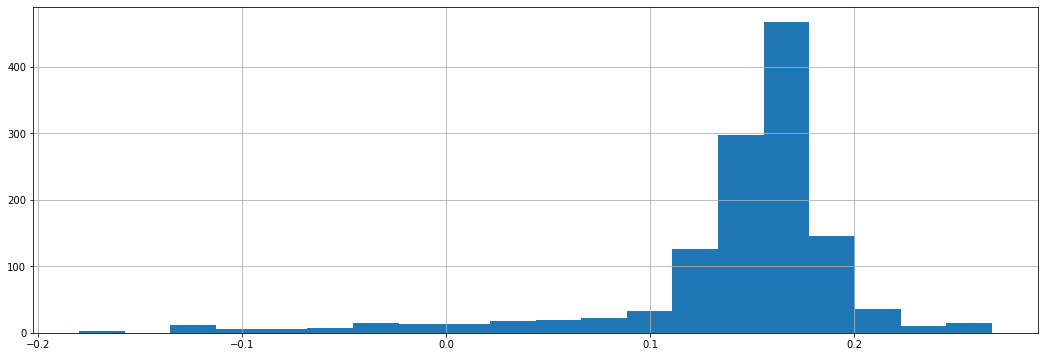

In [39]:
f, ax = plt.subplots(figsize=(18, 6))
accuracy_model_DTC['r2'].hist(bins = 20)

In [40]:
result_r2_DTC_max = accuracy_model_DTC['r2'].max()
accuracy_model_DTC.query('r2 == @result_r2_DTC_max')

,r2,max_depth,min_samples_split,min_samples_leaf,max_features
123,0.267661,4.0,14.0,1.0,4.0


In [45]:
model_dtr_1 = DecisionTreeRegressor(
    random_state=12345, 
    max_depth=4,
    min_samples_split=14,
    min_samples_leaf=1,
    max_features=4)
cross_val_score(model_dtr_1, age_train_features, age_train_target, cv=3, scoring='r2')
model_dtr_1 = model_dtr_1.fit(age_train_features, age_train_target)

In [47]:
model_rfr_1 = RandomForestRegressor(
    random_state=12345, 
    n_estimators = 8,
    max_depth=4,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features=3, bootstrap = False)
cross_val_score(model_rfr_1, age_train_features, age_train_target, cv=3, scoring='r2')
model_rfr_1 = model_rfr_1.fit(age_train_features, age_train_target)

In [46]:
predictions_test_dtr = model_dtr_1.predict(age_columns_ml_test_features)
median_absolute_error(age_columns_ml_test_target, predictions_test_dtr)

7.112903225806452

In [48]:
predictions_test_rfr = model_rfr_1.predict(age_columns_ml_test_features)
median_absolute_error(age_columns_ml_test_target, predictions_test_dtr)

7.112903225806452

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021AF1685D60>]],
      dtype=object)

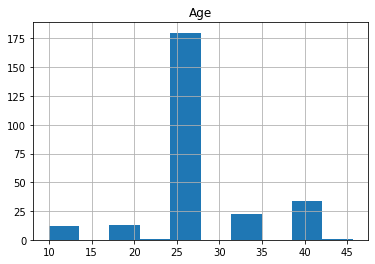

In [49]:
predictions_test_dtr = model_dtr_1.predict(age_columns_ml_1)
predictions_age = pd.DataFrame(predictions_test_dtr, columns = ['Age'])
predictions_age.hist()

In [50]:
age_columns_ml_fill = age_columns_ml_1.reset_index()
age_columns_ml_fill['Age'] = predictions_age['Age']

In [51]:
age_columns_ml_fill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  263 non-null    int64  
 1   Pclass       263 non-null    int64  
 2   SibSp        263 non-null    int64  
 3   Parch        263 non-null    int64  
 4   Fare         263 non-null    float64
 5   Age          263 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 12.5 KB


In [52]:
age_columns_ml_fill['Age'] = age_columns_ml_fill['Age'].astype('int')

In [53]:
age_columns_ml_fill.head()

,PassengerId,Pclass,SibSp,Parch,Fare,Age
0,6,3,0,0,8.4583,27
1,18,2,0,0,13.0000,33
2,20,3,0,0,7.2250,27
3,27,3,0,0,7.2250,27
4,29,3,0,0,7.8792,27


In [54]:
def fill_age(row):
    Age = row['Age']
    if math.isnan(Age) :
        PassengerId_tmp = row['PassengerId']
        try:
            if math.isnan(age_columns_ml_fill.query('PassengerId == @PassengerId_tmp')['Age'][0]) :
                Age = age_columns_ml_fill.query('PassengerId == @PassengerId_tmp')['Age'][0]
        except: return Age
    return Age

In [55]:
PassengerId_tmp = 892
df_test.query('PassengerId == @PassengerId_tmp')['Age'][0]

34.5

In [56]:
df_test.head(11)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",1,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",0,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",1,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",1,21.0,2,0,A/4 48871,24.1500,NaN,S


In [57]:
age_columns_ml_fill = age_columns_ml_fill.set_index('PassengerId')

df_test = df_test.set_index('PassengerId')
df_test['Age'] = df_test['Age'].fillna(value=age_columns_ml_fill.Age)
df_test = df_test.reset_index()
df_test.head(11)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",1,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",0,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",1,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",1,21.0,2,0,A/4 48871,24.1500,NaN,S


In [58]:
df_train.head(11)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C


In [59]:
df_train = df_train.set_index('PassengerId')
df_train['Age'] = df_train['Age'].fillna(value=age_columns_ml_fill.Age)
df_train = df_train.reset_index()
df_train.head(11)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,27.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C


In [60]:
df_train = df_train.drop(['Cabin', 'Name', 'Ticket'], axis=1)
df_test = df_test.drop(['Cabin', 'Name', 'Ticket'], axis=1)

In [61]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 26.2+ KB


In [62]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 62.8+ KB


In [63]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [64]:
df_test = df_test.set_index('PassengerId')
df_train = df_train.set_index('PassengerId')

_Столбец Embarked имеет категориальные значения. Преобразуем их в количественные_

In [65]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,S
2,1,1,0,38.0,1,0,71.2833,C
3,1,3,0,26.0,0,0,7.9250,S
4,1,1,0,35.0,1,0,53.1000,S
5,0,3,1,35.0,0,0,8.0500,S


In [66]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
data_ordinal_train = pd.DataFrame(encoder.fit_transform(df_train),columns=df_train.columns)
data_ordinal_test = pd.DataFrame(encoder.fit_transform(df_test),columns=df_test.columns)

In [67]:
data_ordinal_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,2.0,1.0,28.0,1.0,0.0,17.0,2.0
1,1.0,0.0,0.0,51.0,1.0,0.0,207.0,0.0
2,1.0,2.0,0.0,34.0,0.0,0.0,40.0,2.0
3,1.0,0.0,0.0,47.0,1.0,0.0,188.0,2.0
4,0.0,2.0,1.0,47.0,0.0,0.0,42.0,2.0


###-Балансировка классов

In [68]:
train_features, train_target, valid_features, valid_target = df_split(data_ordinal_train, 'Survived')

from sklearn.utils import shuffle

def upsample(features, target):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] * 4  + [features_ones] * 6)
    target_upsampled = pd.concat([target_zeros] * 4 + [target_ones] * 6)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(train_features, train_target)


# Масштабирование

In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_features)
train_features_scale = scaler.transform(train_features)
valid_features_scale = scaler.transform(valid_features)

### Предсказания целевого признака

In [137]:
#Количество деревьев в случайном лесу
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 100)]
#Количество полей , которые необходимо учитывать при каждом разделении
max_features = [1, 2, 3,4,5,6,7]
# Максимальное количество уровней в дереве
max_depth = [int(x) for x in np.linspace(2, 30, num = 15)]
max_depth.append(None)
# Минимальное количество выборок, необходимых для разделения узла
min_samples_split = [int(x) for x in np.linspace(2, 30, num = 15)]
# Минимальное количество образцов, необходимое на каждом листовом узле
min_samples_leaf = [1, 2, 4,6,8]
# Способ отбора образцов для обучения каждого дерева
bootstrap = [True, False]

# Создаем случайную сетку
random_grid_1 = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid_1)

{'n_estimators': [20, 21, 23, 25, 27, 29, 30, 32, 34, 36, 38, 40, 41, 43, 45, 47, 49, 50, 52, 54, 56, 58, 60, 61, 63, 65, 67, 69, 70, 72, 74, 76, 78, 80, 81, 83, 85, 87, 89, 90, 92, 94, 96, 98, 100, 101, 103, 105, 107, 109, 110, 112, 114, 116, 118, 120, 121, 123, 125, 127, 129, 130, 132, 134, 136, 138, 140, 141, 143, 145, 147, 149, 150, 152, 154, 156, 158, 160, 161, 163, 165, 167, 169, 170, 172, 174, 176, 178, 180, 181, 183, 185, 187, 189, 190, 192, 194, 196, 198, 200], 'max_features': [1, 2, 3, 4, 5, 6, 7], 'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, None], 'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30], 'min_samples_leaf': [1, 2, 4, 6, 8], 'bootstrap': [True, False]}


In [138]:
start = time() #время выполнения 3 минуты
rf1 = RandomForestClassifier(random_state=12345)
# Случайный поиск параметров с кросс-валдицией, поиск с шагом 100 различных комбинаций параметров
rf_random1 = RandomizedSearchCV( estimator = rf1, param_distributions = random_grid_1,   n_iter = 100, cv = 3, 
                               verbose=0, random_state=12345, n_jobs = -1, scoring = 'f1' )
rf_random1.fit(train_features, train_target)
rf_random1.best_params_

print('Время выполнения: {0:0.2f} сек'.format(time() - start))

Время выполнения: 22.38 сек


In [139]:
report(rf_random1.cv_results_)

Model with rank: 1
Mean validation score: 0.775 (std: 0.011)
Parameters: {'n_estimators': 174, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 2, 'max_depth': 14, 'bootstrap': True}

Model with rank: 2
Mean validation score: 0.769 (std: 0.007)
Parameters: {'n_estimators': 30, 'min_samples_split': 18, 'min_samples_leaf': 8, 'max_features': 7, 'max_depth': 14, 'bootstrap': True}

Model with rank: 3
Mean validation score: 0.769 (std: 0.005)
Parameters: {'n_estimators': 107, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 2, 'max_depth': 28, 'bootstrap': False}



In [140]:
model = RandomForestClassifier(n_estimators=174, #185,
    random_state=12345, 
    max_depth=14,
    min_samples_split=6,
    min_samples_leaf=2,
    max_features=2, bootstrap = True)  
 
model.fit(train_features_scale, train_target)
scores = cross_val_score(model, train_features_scale, train_target, cv=10 )
print('Средняя оценка качества модели на обучающей выборке равна {:.4f}'.format(scores.mean()))

Средняя оценка качества модели на обучающей выборке равна 0.8427


In [141]:
#model.predictions = model_tmp.predict(features_valid)
scores = cross_val_score(model, valid_features_scale, valid_target, cv=10 )
print('Средняя оценка качества модели на обучающей выборке равна {:.4f}'.format(scores.mean()))

Средняя оценка качества модели на обучающей выборке равна 0.7668


In [142]:
d_train_f = data_ordinal_train.drop(['Survived'], axis = 1)
d_train_f_scale = scaler.transform(d_train_f)
d_train_t = data_ordinal_train['Survived']
scores = cross_val_score(model, d_train_f_scale, d_train_t, cv=10 )
print('Средняя оценка качества модели на обучающей выборке равна {:.4f}'.format(scores.mean()))

Средняя оценка качества модели на обучающей выборке равна 0.8373


In [143]:
data_ordinal_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    float64
 1   Sex       418 non-null    float64
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    float64
 4   Parch     418 non-null    float64
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    float64
dtypes: float64(7)
memory usage: 23.0 KB


In [144]:
data_ordinal_test_scale = scaler.transform(data_ordinal_test)

In [145]:
predictions_S_rfr = model.predict(data_ordinal_test_scale)
predictions_S = pd.DataFrame(predictions_S_rfr, columns = ['Survived'])
df_test_rfr = df_test.reset_index()
df_test_rfr['Survived'] = predictions_S['Survived'].astype('int')
data_out_test = df_test_rfr[['PassengerId','Survived']]
data_out_test.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [146]:
data_out_test.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [147]:
data_out_test.to_csv('data_out_test.csv', index=False)